Output()

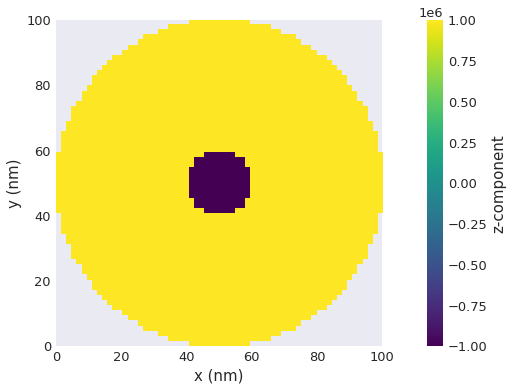

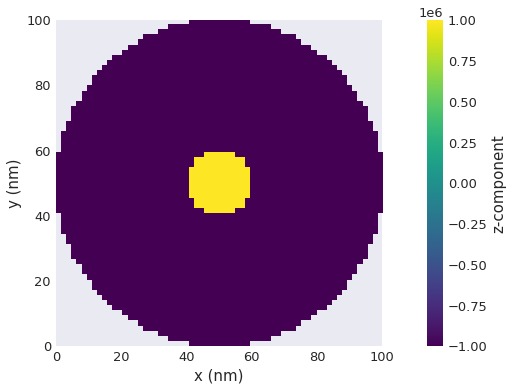

In [8]:
import micromagneticmodel as mm  # mm is just a shorter name we want to use later
import discretisedfield as df
import k3d
import random
import oommfc as oc

random.seed(4)

system = mm.System(name='skyrmtri')
A = 1.5e-11 #exchange energy
MS = 1e6 #saturation magnetization
Ku = 1e6 #uniaxial anisotropy
sig = -1e-4 #RKKY antiferromagnetic coupling


#cell parameters
p1 = (0, 0, 0)
p2 = (100e-9, 100e-9, 3e-9)
region = df.Region(p1=p1, p2=p2)
cell = (1.5625e-9, 1.5625e-9, 1e-9)
subregions = {
    'bottom': df.Region(p1=(0, 0, 0), p2=(100e-9, 100e-9, 1e-9)),
    'spacer': df.Region(p1=(0, 0, 1e-9), p2=(100e-9, 100e-9, 2e-9)),
    'top': df.Region(p1=(0, 0, 2e-9), p2=(100e-9, 100e-9, 3e-9))
}

def ms_fun(pt):
    x,y,z = pt
    Rmax = 50e-9
    if (x-Rmax)**2 + (y-Rmax)**2 < Rmax**2 and (z > 2e-9 or z < 1e-9):
        return MS
    return 0 

def magnetization(pt):
    x,y,z = pt
    R = 10e-9
    Rmax = 50e-9
    if (x-Rmax)**2 + (y-Rmax)**2 < R**2:
        if z > 2e-9:
            return (0,0,1)
        else:
            return (0,0,-1)
    if z > 2e-9:
        return (0,0,-1)
    else:
        return (0,0,1)

mesh = df.Mesh(region=region,cell=cell,subregions=subregions)
system.m = df.Field(mesh, dim=3, value=magnetization, norm=ms_fun)

#Hamiltonian initialization
system.energy = (mm.Exchange(A=A) 
                 + mm.UniaxialAnisotropy(K=Ku, u = (0,0,1)) 
                 + mm.RKKY(sigma=sig, sigma2=0, subregions = ['top','bottom'])
                 + mm.DMI(D={'top': 3e-3, 'bottom':3e-3, 'top:bottom': 0}, crystalclass = 'Cnv') + mm.Demag())


system.m.plane(z=0e-9).mpl(figsize=(16, 6))
system.m.plane(z=2e-9).mpl(figsize=(16, 6))
system.m.z.k3d_scalar(filter_field=system.m.norm)

Running OOMMF (ExeOOMMFRunner) [2020/11/03 04:50]... (9.1 s)


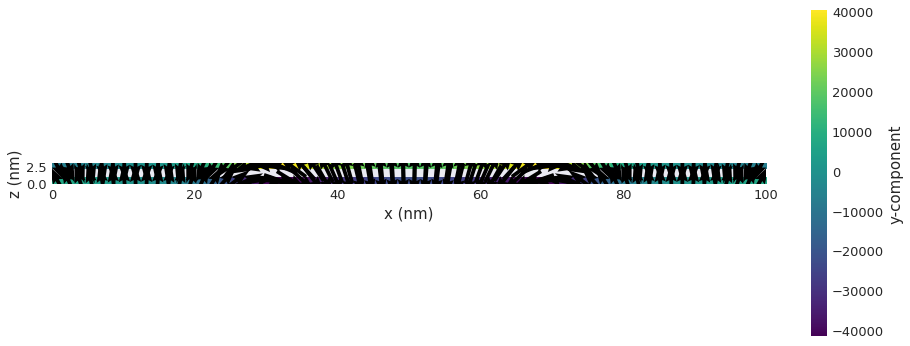

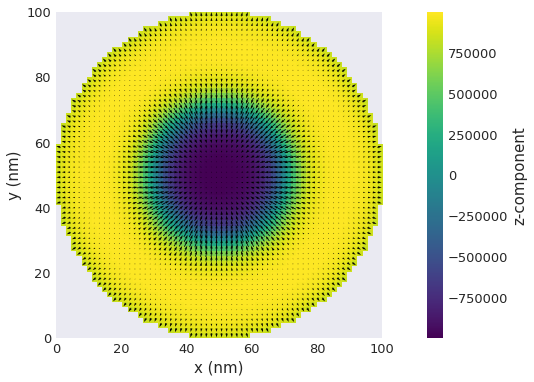

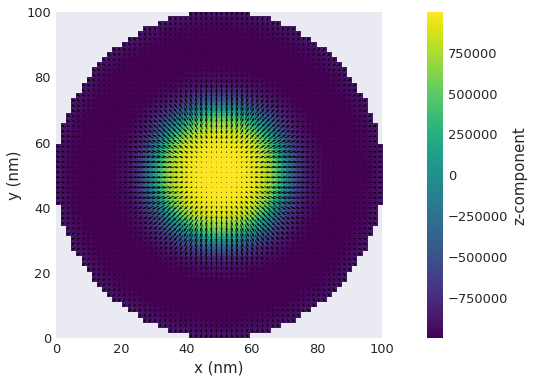

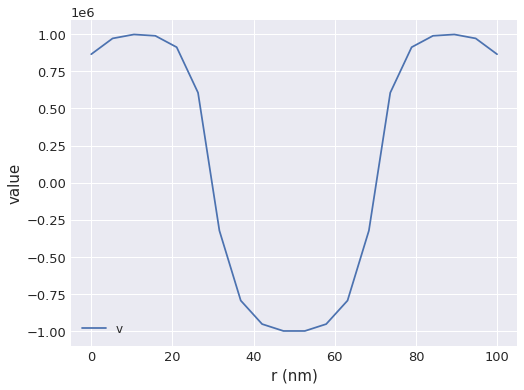

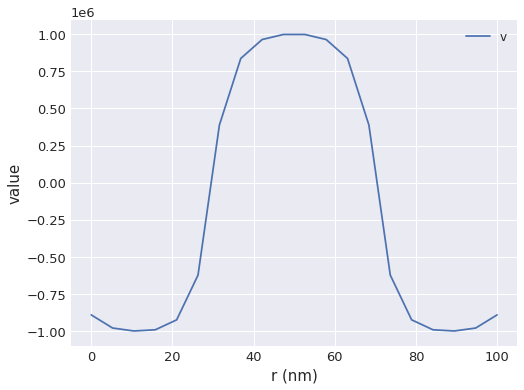

In [9]:
md = oc.MinDriver()
md.drive(system)

system.m.plane(y=50e-9).mpl(figsize=(16,6))
system.m.plane(z=0e-9).mpl(figsize=(16, 6))
system.m.plane(z=2e-9).mpl(figsize=(16, 6))
system.m.z.line(p1=(0, 50e-9, 0), p2=(100e-9, 50e-9, 0), n=20).mpl()
system.m.z.line(p1=(0, 50e-9, 2e-9), p2=(100e-9, 50e-9, 2e-9), n=20).mpl()

Running OOMMF (ExeOOMMFRunner) [2020/11/03 04:58]... (8.7 s)


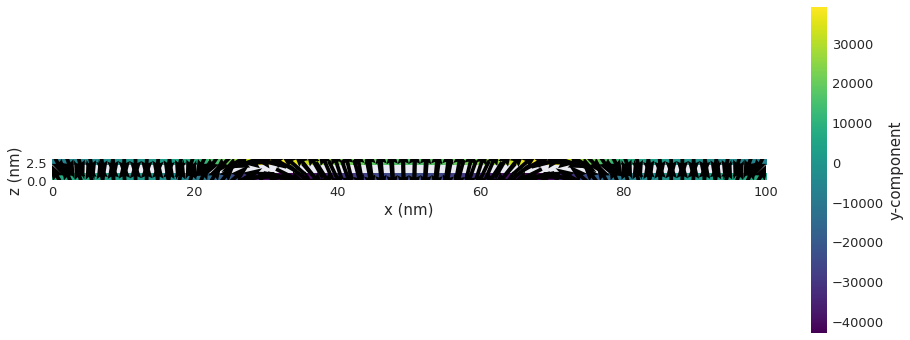

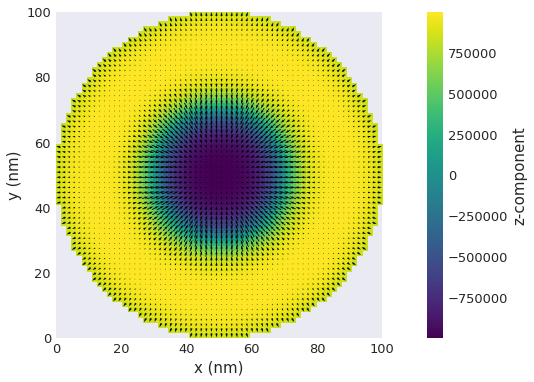

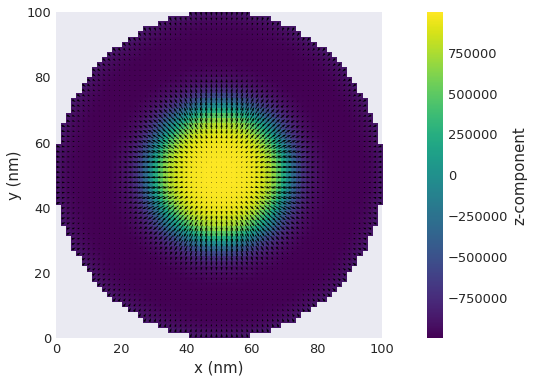

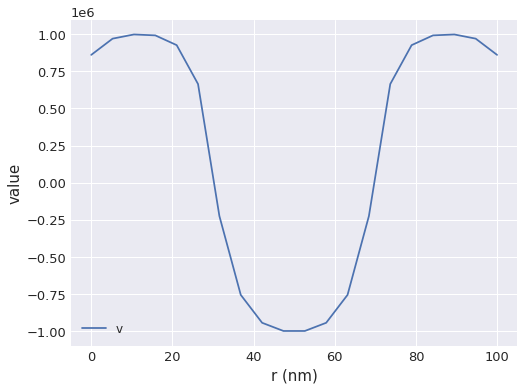

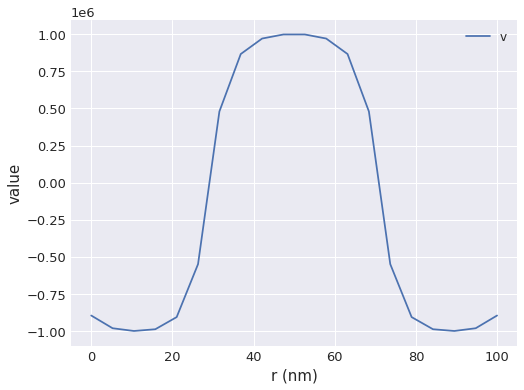

In [10]:
mesh = df.Mesh(region=region,cell=cell,subregions=subregions)
system.m = df.Field(mesh, dim=3, value=magnetization, norm=ms_fun)

#Hamiltonian initialization
system.energy = (mm.Exchange(A=A) 
                 + mm.UniaxialAnisotropy(K=Ku, u = (0,0,1)) 
                 + mm.RKKY(sigma=sig/10, sigma2=0, subregions = ['top','bottom'])
                 + mm.DMI(D={'top': 3e-3, 'bottom':3e-3, 'top:bottom': 0}, crystalclass = 'Cnv') + mm.Demag())

md = oc.MinDriver()
md.drive(system)

system.m.plane(z=0e-9).mpl(figsize=(16, 6))
system.m.plane(z=2e-9).mpl(figsize=(16, 6))
system.m.z.line(p1=(0, 50e-9, 0), p2=(100e-9, 50e-9, 0), n=20).mpl()
system.m.z.line(p1=(0, 50e-9, 2e-9), p2=(100e-9, 50e-9, 2e-9), n=20).mpl()

Running OOMMF (ExeOOMMFRunner) [2020/11/03 04:59]... (14.0 s)


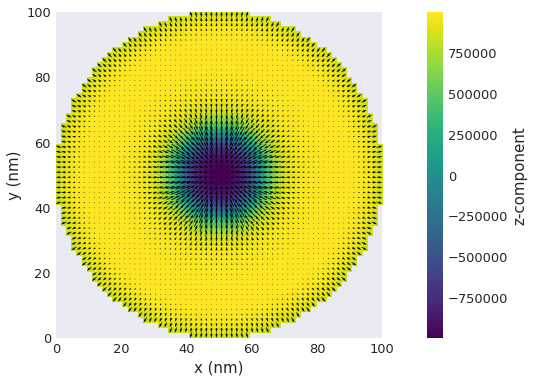

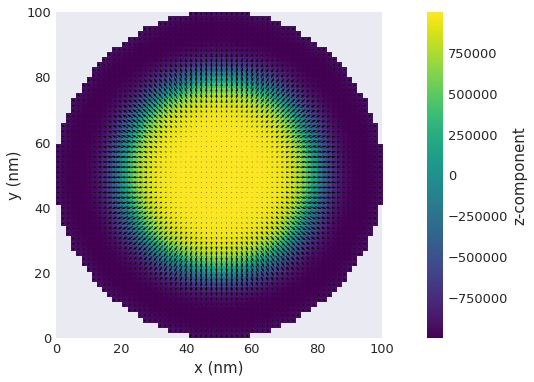

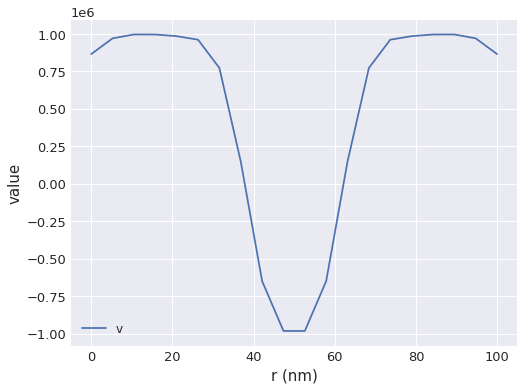

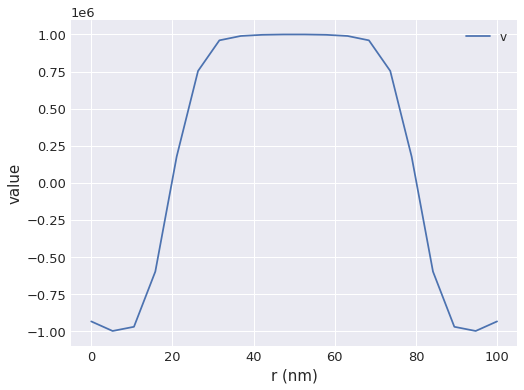

In [11]:
mesh = df.Mesh(region=region,cell=cell,subregions=subregions)
system.m = df.Field(mesh, dim=3, value=magnetization, norm=ms_fun)

#Hamiltonian initialization
system.energy = (mm.Exchange(A=A) 
                 + mm.UniaxialAnisotropy(K=Ku, u = (0,0,1)) 
                 + mm.RKKY(sigma=sig/10, sigma2=0, subregions = ['top','bottom'])
                 + mm.DMI(D={'top': 3e-3, 'bottom':3e-3, 'top:bottom': 0}, crystalclass = 'Cnv') + mm.Demag()
                 + mm.Zeeman(H=(0,0,4e4)))
md = oc.MinDriver()
md.drive(system)

system.m.plane(z=0e-9).mpl(figsize=(16, 6))
system.m.plane(z=2e-9).mpl(figsize=(16, 6))
system.m.z.line(p1=(0, 50e-9, 0), p2=(100e-9, 50e-9, 0), n=20).mpl()
system.m.z.line(p1=(0, 50e-9, 2e-9), p2=(100e-9, 50e-9, 2e-9), n=20).mpl()

Running OOMMF (ExeOOMMFRunner) [2020/11/03 05:03]... (8.8 s)


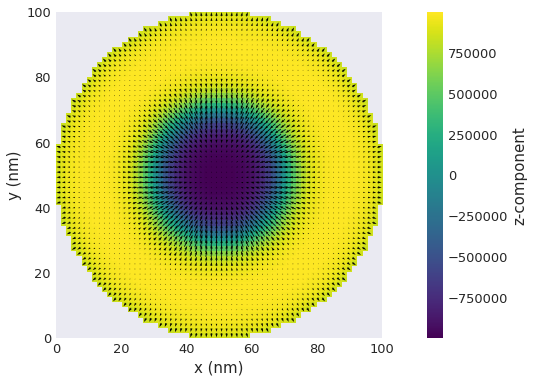

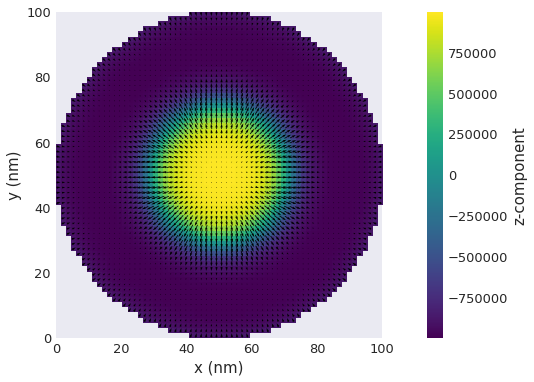

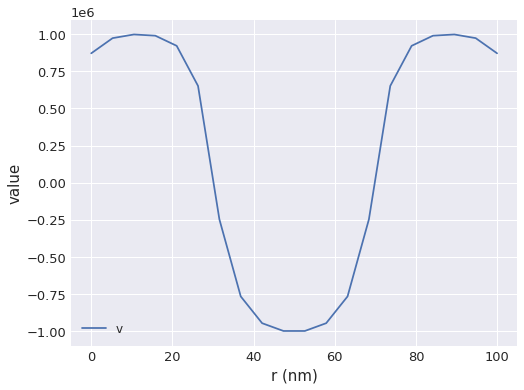

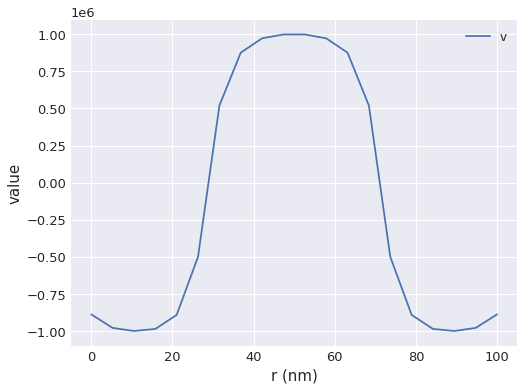

In [12]:
mesh = df.Mesh(region=region,cell=cell,subregions=subregions)
system.m = df.Field(mesh, dim=3, value=magnetization, norm=ms_fun)

#Hamiltonian initialization
system.energy = (mm.Exchange(A=A) 
                 + mm.UniaxialAnisotropy(K=Ku, u = (0,0,1)) 
                 + mm.RKKY(sigma=sig, sigma2=0, subregions = ['top','bottom'])
                 + mm.DMI(D={'top': 3e-3, 'bottom':3e-3, 'top:bottom': 0}, crystalclass = 'Cnv') + mm.Demag()
                 + mm.Zeeman(H=(0,0,4e4)))
md = oc.MinDriver()
md.drive(system)

system.m.plane(z=0e-9).mpl(figsize=(16, 6))
system.m.plane(z=2e-9).mpl(figsize=(16, 6))
system.m.z.line(p1=(0, 50e-9, 0), p2=(100e-9, 50e-9, 0), n=20).mpl()
system.m.z.line(p1=(0, 50e-9, 2e-9), p2=(100e-9, 50e-9, 2e-9), n=20).mpl()

Running OOMMF (ExeOOMMFRunner) [2020/11/03 05:05]... (8.7 s)


/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/quiver.py:686: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/srv/conda/envs/notebook/lib/python3.8/site-packages/matplotlib/quiver.py:686: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


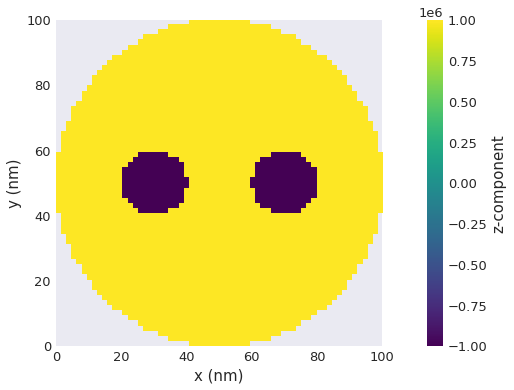

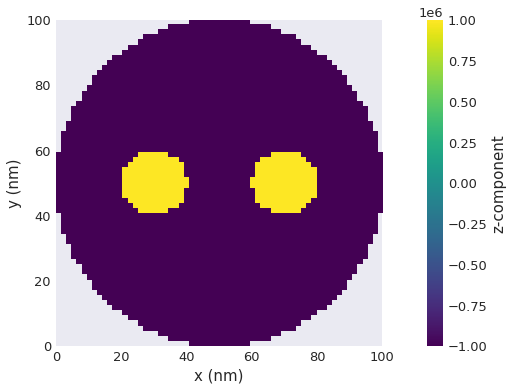

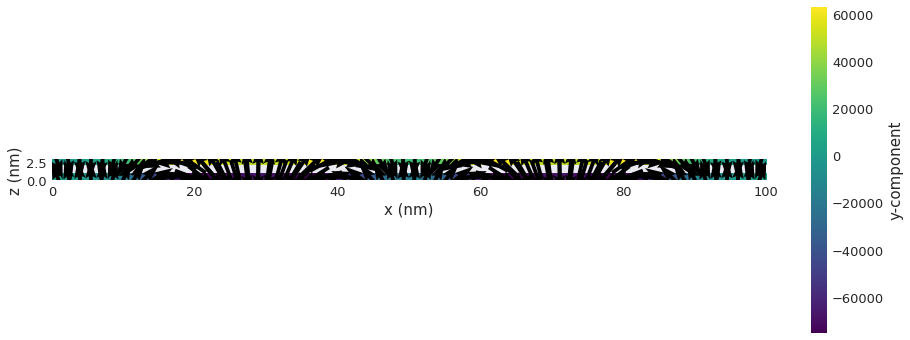

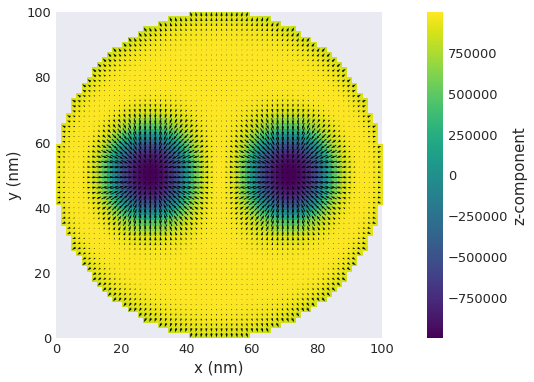

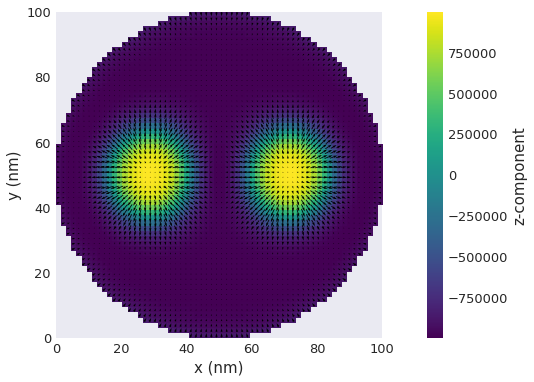

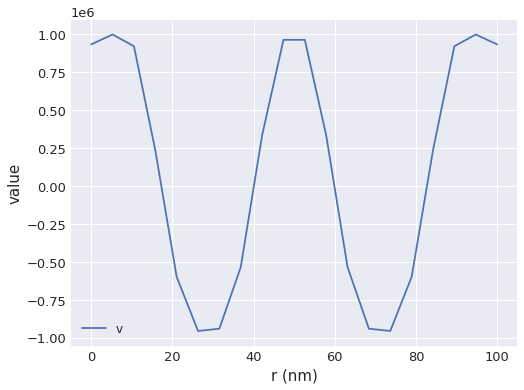

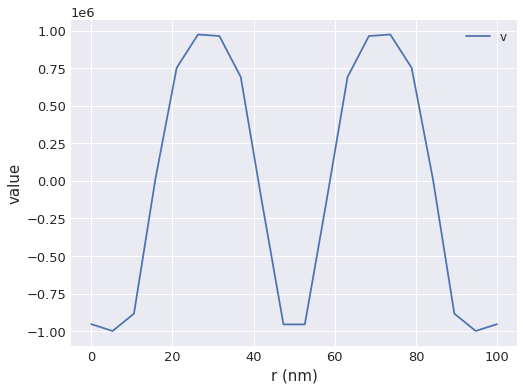

In [13]:
def magnetization2(pt):
    x,y,z = pt
    R = 10e-9
    Rl = 20e-9
    Rmax = 50e-9
    if (x-Rmax-Rl)**2 + (y-Rmax)**2 < R**2:
        if z > 2e-9:
            return (0,0,1)
        else:
            return (0,0,-1)
    elif (x-Rmax+Rl)**2 + (y-Rmax)**2 < R**2:
        if z > 2e-9:
            return (0,0,1)
        else:
            return (0,0,-1)
    if z > 2e-9:
        return (0,0,-1)
    else:
        return (0,0,1)

mesh = df.Mesh(region=region,cell=cell,subregions=subregions)
system.m = df.Field(mesh, dim=3, value=magnetization2, norm=ms_fun)

system.energy = (mm.Exchange(A=A) 
                 + mm.UniaxialAnisotropy(K=Ku, u = (0,0,1)) 
                 + mm.RKKY(sigma=sig, sigma2=0, subregions = ['top','bottom'])
                 + mm.DMI(D={'top': 3e-3, 'bottom':3e-3, 'top:bottom': 0}, crystalclass = 'Cnv') + mm.Demag()
                + mm.Zeeman(H=(0,0,4e4)))

system.m.plane(z=0e-9).mpl(figsize=(16, 6))
system.m.plane(z=2e-9).mpl(figsize=(16, 6))

md = oc.MinDriver()
md.drive(system)

system.m.plane(y=50e-9).mpl(figsize=(16,6))
system.m.plane(z=0e-9).mpl(figsize=(16, 6))
system.m.plane(z=2e-9).mpl(figsize=(16, 6))
system.m.z.line(p1=(0, 50e-9, 0), p2=(100e-9, 50e-9, 0), n=20).mpl()
system.m.z.line(p1=(0, 50e-9, 2e-9), p2=(100e-9, 50e-9, 2e-9), n=20).mpl()